In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Nicolás Aldecoa Rodrigo - 2022/10/09 (last edit: 2022/16/09)

![pseudocode](assets/eulers_method.jpg)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Callable, Tuple, Optional
from tqdm import tqdm

In [3]:
def eulers_approximation(dx_dt: Callable, 
                         x0: float, 
                         delta_t: float, 
                         max_t: float
                         ) -> Tuple[np.ndarray, np.ndarray]:
    
    # calculate the number of iterations
    n_steps = int(max_t / delta_t) + 1
    
    t = np.empty(shape=(n_steps,), dtype=float)
    x_approx = np.empty(shape=(n_steps,), dtype=float)
    
    t[0] = 0
    x_approx[0] = x0
    
    # speed could be greatly improved by vectorizing the following operations,
    # but that would make the implementation harder to understand (that's my excuse)
    for i in tqdm(range(1, n_steps), desc='Running a simulation!'):
        t[i] = t[i - 1] + delta_t
        x_approx[i] = x_approx[i - 1] + delta_t * dx_dt(x_approx[i - 1])
        
    return t, x_approx


def plot_curves(t: np.ndarray,
                x_approx: np.ndarray, 
                x_of_t: Optional[Callable]=None,
                figsize: Tuple[int, int] = (12, 6)
                ) -> None:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        
    # approx curve
    ax1.plot(t, x_approx, color = 'blue', alpha=0.8,
             label='Approximate solution')
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    
    
        
    if x_of_t is not None:
        # calculate the exact values for each timestep
        x_exact = x_of_t(t)
        # curve
        ax1.plot(t, x_exact, linestyle='--', color='black', 
                 label='Analytical solution')
    
        # error
        error = np.abs(x_approx - x_exact) / x_exact
        ax2.plot(t, error, color='orange')
        ax2.set_xlabel('t')
        ax2.set_ylabel('rel. approximation error (abs. value)')
        
    ax1.legend()
    fig.subplots_adjust(left=0.1)
    plt.show()

![example](./assets/eulers_method_homework_example.jpg)

In [4]:
# PARAMETERS FOR THE EXAMPLE dx/dt = 2x
K = 2
X0 = 1
DELTA_T = 0.01
MAX_T = 10

In [5]:
# DIFFERENTIAL EQUATION AND ANALYTICAL SOLUTION
diff_eq_1 = lambda x: K * x
solution_eq_1 = lambda t: X0 * np.exp(K * t)  # (!) make sure to use a vectorized expression 

Running a simulation!: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1001027.21it/s]


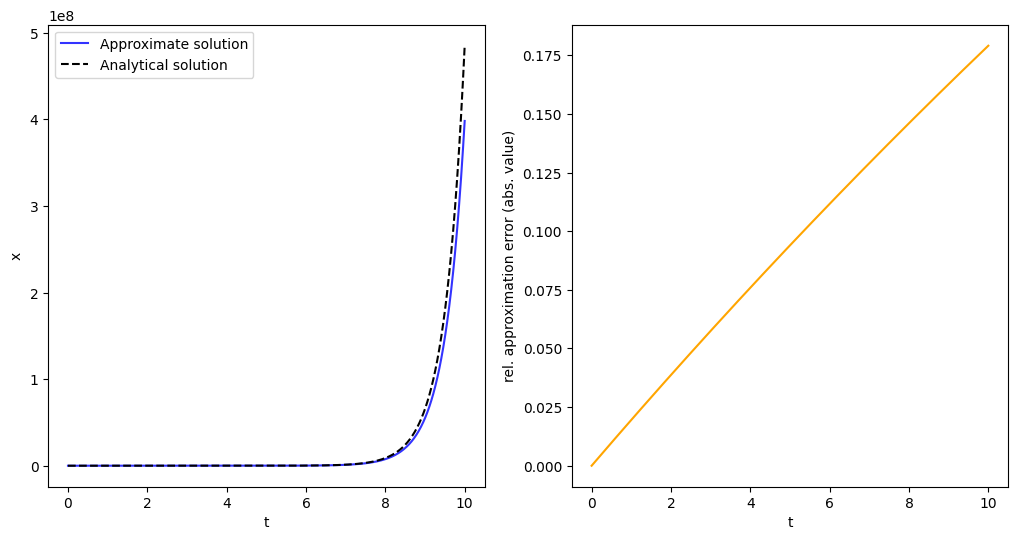

In [6]:
t_1, x_app_1 = eulers_approximation(
    dx_dt = diff_eq_1,
    x0 = X0,
    delta_t = DELTA_T,
    max_t = MAX_T
)

plot_curves(
    t = t_1,
    x_approx = x_app_1,
    x_of_t = solution_eq_1
)

### It's interesting to see that the approximation error is also proportional to the value of X (rel. error has a constant slope), which actually makes sense. It means that the absolute error also grows exponentially.

Let's see the effect of the timestep size on the relative approximation error by exploring it in a logarithmic space: halving 20 times starting from delta_t = 1.0

I'll take the absolute error at the last timestep as my observable because I've already "seen" that it increases monotonically.

In [7]:
# USE THE SAME PARAMETERS AS BEFORE, JUST CHANGE DELTA_T
N_HALVINGS = 20
ts_sizes, errors = [], []
ts = 1
for n in range(N_HALVINGS):
    t_n, x_app_n = eulers_approximation(
        dx_dt = diff_eq_1,
        x0 = X0,
        delta_t = ts,
        max_t = MAX_T
    )
    true_value_at_max_t = solution_eq_1(t_n[-1])
    err_last_ts = abs(x_app_n[-1] - true_value_at_max_t) / true_value_at_max_t
    ts_sizes.append(ts)
    errors.append(err_last_ts)
    ts /= 2

Running a simulation!: 100%|██████████████████████████████████████████████████████████████| 5242880/5242880 [00:03<00:00, 1348385.42it/s]


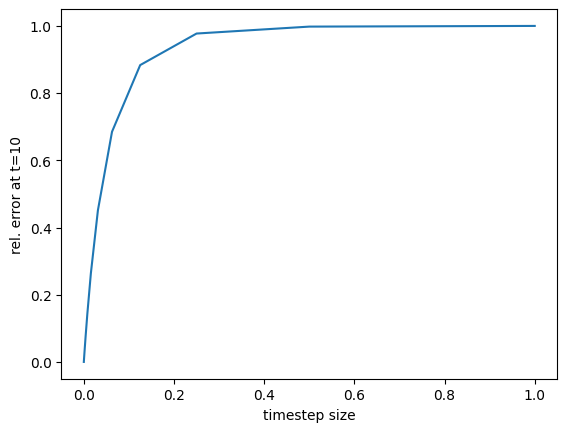

In [8]:
# plot the relative error as a function of the timestep size
plt.plot(ts_sizes, errors)
plt.xlabel('timestep size')
plt.ylabel(f'rel. error at t={MAX_T}')
plt.show()

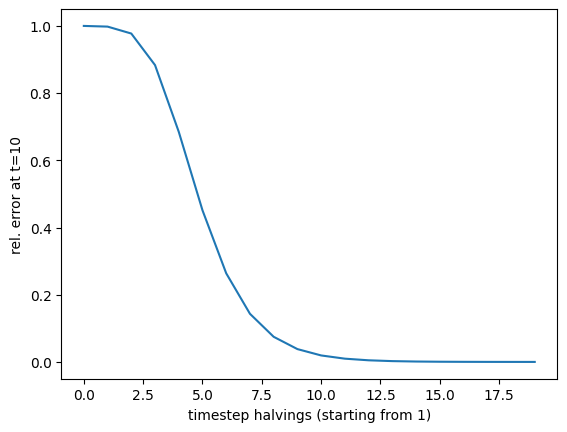

In [9]:
# let's see the same using a log scale
plt.plot(range(N_HALVINGS), errors)
plt.xlabel('timestep halvings (starting from 1)')
plt.ylabel(f'rel. error at t={MAX_T}')
plt.show()

## Let's try that for a function for which we don't have an analytical solution

In [10]:
# PARAMETERS FOR THE EXAMPLE dx/dt = vx/(k+x) - qx
v = 5
k = 2
q = 1
DELTA_T = 1e-5
MAX_T = 10

# DIFFERENTIAL EQUATION
diff_eq_2 = lambda x: v * x / (k + x) - q * x

Running a simulation!: 100%|█████████████████████████████████████████████████████████████████| 999999/999999 [00:01<00:00, 955322.79it/s]


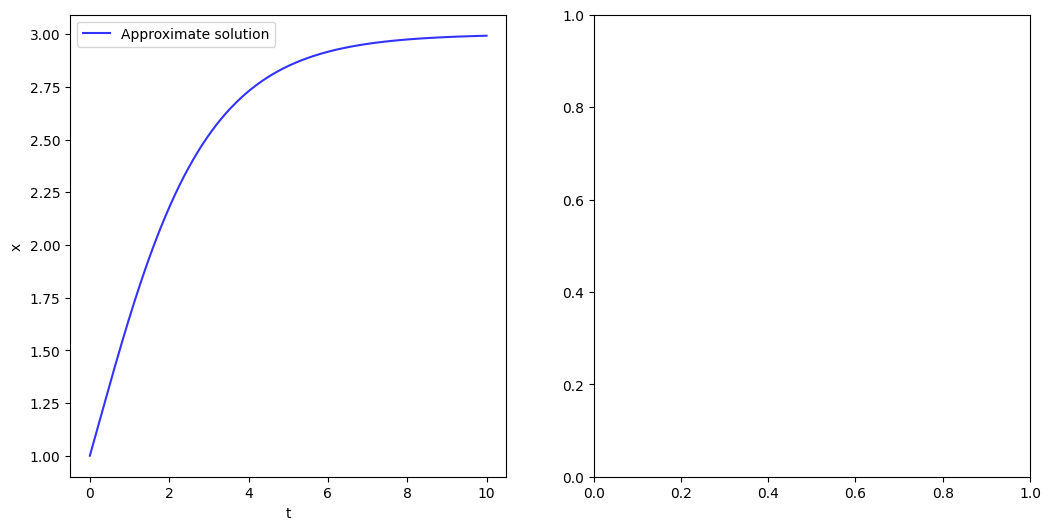

In [11]:
t_2, x_app_2 = eulers_approximation(
    dx_dt = diff_eq_2,
    x0 = X0,
    delta_t = DELTA_T,
    max_t = MAX_T
)


plot_curves(
    t = t_2,
    x_approx = x_app_2
)